['sorvag', 'kirakira', 'roma', 'sentyabrskiy', 'atuona', 'madison', 'vostok', 'severo-kurilsk', 'albany', 'westerland', 'leningradskiy', 'provideniya', 'tuatapere', 'hermanus', 'chase', 'sorong', 'qaanaaq', 'saleaula', 'minsk', 'tasiilaq', 'busselton', 'cherskiy', 'atasu', 'bluff', 'asau', 'punta arenas', 'port alfred', 'killybegs', 'college', 'kapaa', 'balabac', 'mogadishu', 'tsihombe', 'cumaribo', 'cabo san lucas', 'mataura', 'vaini', 'saskylakh', 'narsaq', 'puerto ayora', 'thompson', 'yatou', 'carnarvon', 'cidreira', 'ushuaia', 'adrar', 'limoges', 'saryshagan', 'bitung', 'hobart', 'barrow', 'khatanga', 'mazeikiai', 'ribeira grande', 'satitoa', 'hilo', 'gayeri', 'syracuse', 'belushya guba', 'butaritari', 'clyde river', 'mar del plata', 'port elizabeth', 'chuy', 'katsuura', 'creston', 'hermosillo', 'taolanaro', 'krasnyy chikoy', 'bayshore gardens', 'bambous virieux', 'byron bay', 'aykhal', 'tilichiki', 'lincoln', 'bredasdorp', 'rikitea', 'ossora', 'namatanai', 'riyadh', 'nikolskoye', 

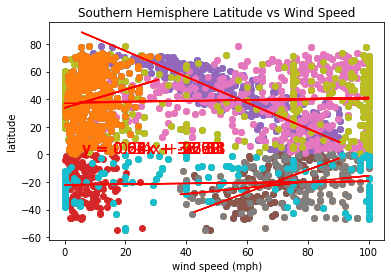

In [1]:
import pandas as pd
from WeatherPy import df
import requests
import json
from api_keys import g_key
import gmaps

gmaps.configure(api_key=g_key)

In [2]:
df

,temperature,humidity,cloudiness,wind speed,latitude,longitude
0,84.06,76,94,11.27,-10.4544,161.9205
1,47.66,53,0,3.44,43.2128,-75.4557
2,78.94,73,55,15.88,-9.8000,-139.0333
3,56.34,87,100,9.22,34.7334,-86.5667
4,38.08,81,100,12.75,46.4856,135.8833
...,...,...,...,...,...,...
577,82.90,24,0,0.40,28.5833,65.4167
578,48.85,89,1,7.00,51.3813,1.3862
579,76.93,74,97,3.02,21.3167,103.9000
580,65.55,91,47,6.35,-16.6228,-72.7111


In [3]:
idealdf = df.loc[(df['temperature']<80)&(df['temperature']>70),:]
idealdf = df.loc[df['wind speed']<10,:]
idealdf = df.loc[df['cloudiness']==0,:]

idealdf = idealdf.reset_index()

idealdf = idealdf[:10]

idealdf

,index,temperature,humidity,cloudiness,wind speed,latitude,longitude
0,1,47.66,53,0,3.44,43.2128,-75.4557
1,29,85.60,34,0,5.75,22.8909,-109.9124
2,38,63.32,75,0,9.60,-30.1811,-50.2056
3,41,54.16,71,0,4.61,45.7500,1.3333
4,53,60.93,83,0,13.80,-38.0023,-57.5575
5,54,56.61,78,0,5.75,-33.9180,25.5701
6,57,62.56,59,0,17.27,41.0586,-94.3614
7,58,90.28,13,0,8.99,29.0667,-110.9667
8,60,76.64,73,0,10.36,27.4253,-82.5904
9,76,53.38,87,0,6.73,-28.5500,16.4333


In [4]:
coordsdf = idealdf[['latitude', 'longitude']].astype(str)
coordsdf.head()

dfconcat = coordsdf[['latitude', 'longitude']].agg(','.join, axis = 1)
dfconcat

0     43.2128,-75.4557
1    22.8909,-109.9124
2    -30.1811,-50.2056
3         45.75,1.3333
4    -38.0023,-57.5575
5      -33.918,25.5701
6     41.0586,-94.3614
7    29.0667,-110.9667
8     27.4253,-82.5904
9       -28.55,16.4333
dtype: object

In [5]:
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

search_lats = []
search_longs = []
hotel_name = []
address = []
hotel_country = []


target_search = "Hotel"
target_radius = 5000
target_type = "lodging"
    
for coords in dfconcat:
    target_coordinates = coords
    
    params = {
        'location': target_coordinates,
        'keyword': target_search,
        'radius': target_radius,
        'type': target_type,
        'key': g_key
    }
    
    
    try:
        response = requests.get(base_url,params=params).json()
        search_lats.append(response['results'][0]['geometry']['location']['lat'])
        search_longs.append(response['results'][0]['geometry']['location']['lng'])
        hotel_name.append(response['results'][0]['name'])
        address.append(response['results'][0]['vicinity'])
        print('working...')
        
    except:
        print('not working...')


working...
working...
working...
working...
working...
working...
working...
working...
working...
working...


In [6]:
#need to combine lats and lngs and use geocode to get country

coords_concat = coordsdf[['latitude', 'longitude']].agg(','.join, axis = 1)
dfconcat

0     43.2128,-75.4557
1    22.8909,-109.9124
2    -30.1811,-50.2056
3         45.75,1.3333
4    -38.0023,-57.5575
5      -33.918,25.5701
6     41.0586,-94.3614
7    29.0667,-110.9667
8     27.4253,-82.5904
9       -28.55,16.4333
dtype: object

In [7]:
for coordinates in coords_concat:
    
    try:
        geo_url = f"https://maps.googleapis.com/maps/api/geocode/json?latlng={coordinates}&key={g_key}"
        response = requests.get(geo_url).json()
        hotel_country.append(response['results'][0]['address_components'][5]['long_name'])
        address.append(response['results'][0]['address_components'][2]['long_name'])
        print('getting hotel city and country...')
        
    except:
        print('not working...')

getting hotel city and country...
getting hotel city and country...
getting hotel city and country...
getting hotel city and country...
getting hotel city and country...
getting hotel city and country...
getting hotel city and country...
not working...
getting hotel city and country...
not working...


In [8]:
address

['1352 Floyd Ave, Rome',
 'Carretera Transpeninsular Km 4 1 El Teza, Cabo San Lucas',
 'Av. Mostardeiro, 3668 - Centro, Cidreira',
 'Domaine du Reynou, Le Vigen',
 'Corrientes 1886, Centro, Mar del Plata',
 'Athol Fugard Terrace, Port Elizabeth Central, Gqeberha',
 '900 S Sumner Ave, Creston',
 'Blvr. P.º Río Sonora Nte. 172, Proyecto Rio Sonora Hermosillo XXI, Hermosillo',
 '6511 14th St W, Bradenton',
 'CCRM+4V8, Oranjemund',
 'Rome',
 'Downtown',
 'CIDREIRA',
 'Haute-Vienne',
 'Mar del Plata',
 'Young Park',
 'Creston',
 'Bradenton']

In [9]:
mapDict = {
    'Hotel Name': hotel_name,
    'City': address,
    'Country': hotel_country,
    'Coordinates': coords_concat,
    'Latitude': coordsdf['latitude'],
    'Longitude': coordsdf['longitude']
}

mapDF = pd.DataFrame.from_dict(mapDict, orient = 'index')

mapDF = mapDF.transpose()
mapDF

newMapDF = mapDF[:8]
newMapDF.head()

,Hotel Name,City,Country,Coordinates,Latitude,Longitude
0,Hampton Inn Rome,"1352 Floyd Ave, Rome",United States,"43.2128,-75.4557",43.2128,-75.4557
1,Comfort Inn & Suites Los Cabos,"Carretera Transpeninsular Km 4 1 El Teza, Cabo...",Baja California Sur,"22.8909,-109.9124",22.8909,-109.9124
2,Novo Litoral Norte Hotel,"Av. Mostardeiro, 3668 - Centro, Cidreira",Brazil,"-30.1811,-50.2056",-30.1811,-50.2056
3,Les Lodges du Reynou,"Domaine du Reynou, Le Vigen",87260,"45.75,1.3333",45.75,1.3333
4,Hotel Montreal,"Corrientes 1886, Centro, Mar del Plata",Argentina,"-38.0023,-57.5575",-38.0023,-57.5575


In [10]:
maphumid = df.iloc[0:7,1]

mapcoords = df[['latitude', 'longitude']]

idealmapcoords = newMapDF[['Latitude', 'Longitude']].astype(float)

In [11]:
humidresults = df['humidity']

In [12]:
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
heat_layer = gmaps.heatmap_layer(mapcoords, weights=humidresults, 
                                 max_intensity=30, point_radius = 3,
                                dissipating=False)
#convert maphumid like mapcoords  
markers = gmaps.marker_layer(idealmapcoords,
                            hover_text='hello')
fig.add_layer(markers)
fig.add_layer(heat_layer)
fig   

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…